# Gradient descent on point mass

In [86]:
%load_ext autoreload
%autoreload 2
import site
import sys
site.addsitedir('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
import numpy as np
from  matplotlib import pyplot as plt
from src.utils import *
from src.projection import project_spatial, project, rotate
from src.interpolate import *
import jax
import jax.numpy as jnp

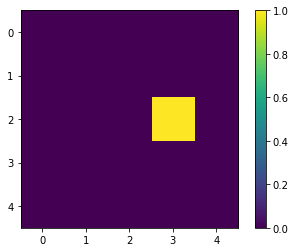

In [220]:
nx = 5
shape = np.array([nx, nx, nx])
dimensions = np.array([1, 1, 1])
radius = 1/(2*nx)
centre = np.array([0.2,0,0])
intensity = 1

v = jnp.array(spherical_volume(shape, dimensions, centre, radius, intensity, False))
plt.imshow(v[:,:,2]); plt.colorbar()

angles = np.array([0,0,0])

In [199]:
#v_proj = project_spatial(v, [0,0,np.pi/2], dimensions, "tri")
#plt.imshow(v_proj); plt.colorbar()

## Define the functions

In [458]:
v_func = lambda a: project_spatial(v, a, dimensions, "tri")
a_true = jnp.array([np.pi, np.pi/4*3, np.pi/3*5])
img1 = v_func(a_true)
loss_func = jax.jit(lambda a: 1/(2*25) * jnp.sum((v_func(a) - img1)**2))
dloss = jax.grad(loss_func)
ddloss = jax.hessian(loss_func)

## Run gradient descent

In [446]:
jnp.linalg.inv(ddloss(a0)) @ dloss(a0)

DeviceArray([-0.03268794,  0.00049734,  0.00150418], dtype=float32)

In [471]:
#a0 = np.random.rand()*2*np.pi * jnp.ones(3)
#a0 = np.pi/2 + 0.1
a0 = jnp.array([np.pi, np.pi/4*3, np.pi/3*5]) + 0.1
alpha = 1/beta
a = a0
iters = 500
l1 = 0
y1 = a
for i in range(iters):
    if np.mod(i,100) == 0:
        print(str(i) + ": loss = " + str(loss_func(a)))

    a = a - jnp.linalg.inv(ddloss(a)) @ dloss(a)

0: loss = 0.0004608906
100: loss = 7.6513444e-16
200: loss = 7.6513444e-16
300: loss = 7.6513444e-16


KeyboardInterrupt: 

In [430]:
a0 = np.random.rand()*2*np.pi * jnp.ones(3)
#a0 = np.pi/2 + 0.1
alpha = 1/beta
a = a0
iters = 3000
l1 = 0
y1 = a
for i in range(iters):
    if np.mod(i,100) == 0:
        print(str(i) + ": loss = " + str(loss_func(a)))
        
    l0 = l1    
    l1 = (1 + jnp.sqrt(1 + 4 * l0**2))/2 
    g = (1-l0)/l1
    
    y0 = y1
    y1 = a - alpha * dloss(a)
    a = (1-g)*y1 + g*y0
    


0: loss = 0.024962293
100: loss = 1.7707862e-08
200: loss = 1.5150865e-10
300: loss = 9.0692905e-12
400: loss = 3.6487887e-12
500: loss = 4.0390933e-13
600: loss = 1.7662588e-12
700: loss = 4.0464935e-13
800: loss = 7.596583e-13
900: loss = 2.285769e-12
1000: loss = 2.3390404e-13
1100: loss = 7.1854106e-13
1200: loss = 2.421107e-12
1300: loss = 3.1958232e-12
1400: loss = 3.4008926e-12
1500: loss = 2.9477365e-12
1600: loss = 1.02416285e-13
1700: loss = 4.7391943e-12
1800: loss = 2.389328e-12
1900: loss = 4.2573822e-13
2000: loss = 1.430736e-12
2100: loss = 7.3724655e-12
2200: loss = 2.0070516e-13
2300: loss = 5.136452e-14
2400: loss = 7.573328e-13
2500: loss = 1.4474894e-11
2600: loss = 1.7866774e-11
2700: loss = 4.740809e-13
2800: loss = 2.8486241e-12
2900: loss = 2.428609e-12


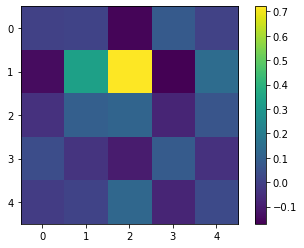

In [455]:
plt.imshow(v_func(a_true)); plt.colorbar()

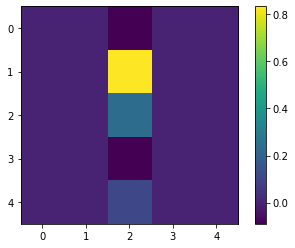

In [456]:
plt.imshow(v_func(a)); plt.colorbar()

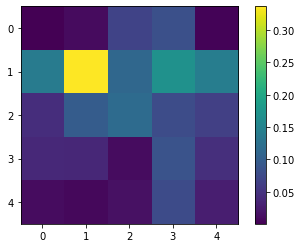

In [457]:
plt.imshow(abs(v_func(a) - v_func(a_true))); plt.colorbar()